In [73]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from jcopml.pipeline import num_pipe, cat_pipe

# import library yang dibutuhkan

In [74]:
df = pd.read_csv('Data Training.csv')
df

# memanggil data training dengan mengganti saran_jurusan menjadi nilai integer. ket : 1 = TKJ, 2 = MM, 3 = RPL

,No,Nama,komputer_dan_jaringan_dasar,pemrograman_dasar,dasar_desain_grafis,jumlah_nilai,rata_rata,saran_jurusan
0,1,AHMAD DWI ZAMRONI,83,80,80,328,82.00,1
1,2,ALIF ZAKY LUTFIANSYAH,84,80,80,329,82.25,1
2,3,ARIVALDI WAGIYONO,84,82,80,329,82.25,1
3,4,DAFANSYAH GILANG RAMADHAN,83,80,80,323,80.75,1
4,5,DERI ALMAHFUT,83,78,85,321,80.25,2
5,6,EDO KASYA MULYA,83,78,80,321,80.25,1
6,7,ELVIA AYU ANADEA,83,80,85,328,82.00,2
7,8,FENDI FEBRIAN,75,80,78,306,76.50,3
8,9,FERNANDO HOGI HARTONO,83,85,80,328,82.00,3


In [75]:
X = df.drop(columns="saran_jurusan")
y = df.saran_jurusan

# menghapus semua kolom kecuali kolom saran_jurusan
# y merupakan target dalam analisis ini

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# memisahkan data training 80% dan data testing 20% (test_size = 0.2)

((7, 7), (2, 7), (7,), (2,))

In [77]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ["komputer_dan_jaringan_dasar","pemrograman_dasar","dasar_desain_grafis"]),
])

# memasukkan data kedalam variabel prepocessor dengan menggunakan perintah column transformer dari library sklearn

In [78]:
from sklearn.naive_bayes import GaussianNB
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', GaussianNB())
])

# mengimpor dari sklearn metode naive bayes dengan tipe analisis gaussianNB
# membuat pipeline yang berisi 2 kolom yaitu preprocessor dan algoritma gaussianNB

In [79]:
pipeline.fit(X_train, y_train)

# melakukan training data dari variabel pipeline tadi

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['komputer_dan_jaringan_dasar',
                                                   'pemrograman_dasar',
                                                   'dasar_desain_grafis'])])),
                ('algo', GaussianNB())])

In [80]:
pipeline.score(X_train, y_train)

# melihat score training data

1.0

In [81]:
pipeline.score(X_test, y_test)

# melihat score data testing 

0.5

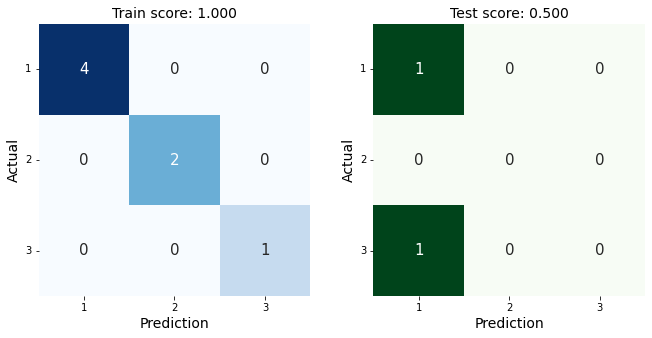

In [82]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, pipeline)

# menampilkan matriks confusion

In [83]:
X_pred = pd.read_csv("Nilai Akhir kelas TI.csv")
X_pred

# setelah melihat skor matriks, maka kita coba terapkan ke data yang akan kita analisis menggunakan naive byes

,No,Nama,komputer_dan_jaringan_dasar,pemrograman_dasar,dasar_desain_grafis,jumlah_nilai,rata_rata
0,1,AHMAD DWI ZAMRONI,83,80,80,328,82.00
1,2,ALIF ZAKY LUTFIANSYAH,84,80,80,329,82.25
2,3,ARIVALDI WAGIYONO,84,82,80,329,82.25
3,4,DAFANSYAH GILANG RAMADHAN,83,80,80,323,80.75
4,5,DERI ALMAHFUT,83,78,85,321,80.25
5,6,EDO KASYA MULYA,83,78,80,321,80.25
6,7,ELVIA AYU ANADEA,83,80,85,328,82.00
7,8,FENDI FEBRIAN,75,80,78,306,76.50
8,9,FERNANDO HOGI HARTONO,83,85,80,328,82.00
9,10,ISFAN FIRMANDA,83,80,80,328,82.00


In [84]:
import numpy as np

hasil = pipeline.predict(X_pred)
hasil_ts = np.empty(len(hasil), dtype='U3')

for i in range(len(hasil_ts)):
    if hasil[i] == 1:
        hasil_ts[i] = "TKJ"
    elif hasil[i] == 2:
        hasil_ts[i] = "MM"
    elif hasil[i] == 3:
        hasil_ts[i] = "RPL"

hasil_ts


# menyimpan data ke dalam variabel hasil, proses ini merupakan penggantian int to string dari kode jurusan, jika 1 maka akan di ganti data string TKJ, jika 2 akan diganti dengan string MM, jika 3 maka diganti dengan string RPL


array(['TKJ', 'TKJ', 'TKJ', 'TKJ', 'MM', 'TKJ', 'MM', 'TKJ', 'RPL', 'TKJ',
       'TKJ', 'TKJ', 'TKJ', 'TKJ', 'TKJ', 'TKJ', 'TKJ', 'TKJ', 'TKJ',
       'TKJ', 'TKJ', 'TKJ', 'TKJ', 'TKJ', 'TKJ', 'TKJ', 'MM', 'MM', 'MM',
       'TKJ', 'MM', 'MM', 'MM', 'MM', 'MM'], dtype='<U3')

In [85]:
X_pred["saran_jurusan"] = hasil_ts
X_pred


# menerapkan hasil analisis dengan kolom baru yaitu saran_jurusan

,No,Nama,komputer_dan_jaringan_dasar,pemrograman_dasar,dasar_desain_grafis,jumlah_nilai,rata_rata,saran_jurusan
0,1,AHMAD DWI ZAMRONI,83,80,80,328,82.00,TKJ
1,2,ALIF ZAKY LUTFIANSYAH,84,80,80,329,82.25,TKJ
2,3,ARIVALDI WAGIYONO,84,82,80,329,82.25,TKJ
3,4,DAFANSYAH GILANG RAMADHAN,83,80,80,323,80.75,TKJ
4,5,DERI ALMAHFUT,83,78,85,321,80.25,MM
5,6,EDO KASYA MULYA,83,78,80,321,80.25,TKJ
6,7,ELVIA AYU ANADEA,83,80,85,328,82.00,MM
7,8,FENDI FEBRIAN,75,80,78,306,76.50,TKJ
8,9,FERNANDO HOGI HARTONO,83,85,80,328,82.00,RPL
9,10,ISFAN FIRMANDA,83,80,80,328,82.00,TKJ


In [86]:
df.to_csv(r'hasil.csv', index=False)
# ekspor file hasil analisis ke dalam bentuk csv